In [1]:
# Author: Ron Weiss <ronweiss@gmail.com>, Gael Varoquaux
# Modified by Thierry Guillemot <thierry.guillemot.work@gmail.com>
# License: BSD 3 clause

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

In [2]:
print(__doc__)

colors = ['navy', 'turquoise', 'darkorange']


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
            
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

Automatically created module for IPython interactive environment


In [3]:
iris = datasets.load_iris()

# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(iris.data, iris.target)))


X_train = iris.data[train_index]
y_train = iris.target[train_index]
X_test = iris.data[test_index]
y_test = iris.target[test_index]

In [4]:
X_train, y_train, X_test, y_test

(array([[4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5.5, 4.2, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.2],
        [5. , 3.2, 1.2, 0.2],
        [5.5, 3.5, 1.3, 0.2],
        [4.9, 3.6, 1.4, 0.1],
        [4.4, 3. , 1.3, 0.2],
        [5.1, 3.4, 1.5, 0.2],
        [5. , 3.5, 1.3, 0.3],
        [4.5, 2.3, 1.3, 0.3],
        [4.4, 3.2, 1.3, 0.2],
        [5. , 3.5, 1.6, 0.6],
        [5.1, 3.8, 1.9, 0.4],
        [4.8, 3. , 1.4, 0.3],
        [5

In [5]:
n_classes = len(np.unique(y_train))
n_classes 

3

In [6]:
n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=20, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)

<Figure size 432x432 with 0 Axes>

In [7]:
for index, (name, estimator) in enumerate(estimators.items()):
    print(index, name, estimator)

0 spherical GaussianMixture(covariance_type='spherical', init_params='kmeans', max_iter=20,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)
1 diag GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=20,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)
2 tied GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=20,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)
3 full GaussianMixture(covariance_type='full', init_params='kmeans

In [8]:

for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    print(index, name, estimator)
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

0 spherical GaussianMixture(covariance_type='spherical', init_params='kmeans', max_iter=20,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)
1 diag GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=20,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)
2 tied GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=20,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)
3 full GaussianMixture(covariance_type='full', init_params='kmeans

[[5.04594595 3.46486486 1.46216216 0.25945946]
 [5.91842105 2.75789474 4.25263158 1.31578947]
 [6.59459459 2.98378378 5.51351351 2.02432432]]
GaussianMixture(covariance_type='spherical', init_params='kmeans', max_iter=20,
                means_init=array([[5.04594595, 3.46486486, 1.46216216, 0.25945946],
       [5.91842105, 2.75789474, 4.25263158, 1.31578947],
       [6.59459459, 2.98378378, 5.51351351, 2.02432432]]),
                n_components=3, n_init=1, precisions_init=None, random_state=0,
                reg_covar=1e-06, tol=0.001, verbose=0, verbose_interval=10,
                warm_start=False, weights_init=None)
(50, 4)
(50, 4)
(50, 4)
[[5.04594595 3.46486486 1.46216216 0.25945946]
 [5.91842105 2.75789474 4.25263158 1.31578947]
 [6.59459459 2.98378378 5.51351351 2.02432432]]
GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=20,
                means_init=array([[5.04594595, 3.46486486, 1.46216216, 0.25945946],
       [5.91842105, 2.75789474, 4.25263158, 

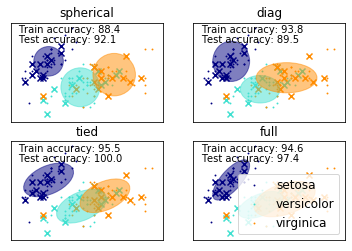

In [16]:

for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    #print(index, name, estimator)
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])
    print(estimator.means_init)

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)
    #print(X_train, X_train.shape)
    print(estimator.fit(X_train))

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        print(data.shape)
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,label=iris.target_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()

In [10]:
X_train

array([[4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.2],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.6, 1.4, 0.1],
       [4.4, 3. , 1.3, 0.2],
       [5.1, 3.4, 1.5, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [4.5, 2.3, 1.3, 0.3],
       [4.4, 3.2, 1.3, 0.2],
       [5. , 3.5, 1.6, 0.6],
       [5.1, 3.8, 1.9, 0.4],
       [4.8, 3. , 1.4, 0.3],
       [5.1, 3.8, 1.6, 0.2],
       [4.6, 3